In [17]:
from PIL import Image
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import cv2
import os
from image_organization import *

In [18]:
path = "../input/biopsy_images/*.jpg"
images = glob.glob(path)

**Prueba para ver cómo se ven las imagenes**

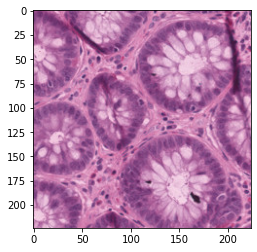

In [19]:
img = Image.open(images[0])
plt.imshow(img)

In [20]:
img.size

(224, 224)

In [21]:
cv2.imread(images[0]).shape

(224, 224, 3)

**Genero un diccionario y un dataframe con todas las imagenes**

In [22]:
path = "../input/biopsy_images"
images = os.listdir(path)

In [23]:
images[0]

'MSS_745.jpg'

In [24]:
images = sorted(images, key = lambda x: (int(x.split("_")[1].split(".")[0]),x))
#images

In [25]:
pics = {}
pics = createDic(images, "MSI", pics)
pics = createDic(images, "MSS", pics)

In [26]:
print(len(pics))
print(len(pics["MSI"]))
print(len(pics["MSS"]))

2
75039
117273


In [27]:
df = createDF(pics)
df

,label,image
0,MSI,MSI_0.jpg
1,MSI,MSI_1.jpg
2,MSI,MSI_2.jpg
3,MSI,MSI_3.jpg
4,MSI,MSI_4.jpg
...,...,...
192307,MSS,MSS_117268.jpg
192308,MSS,MSS_117269.jpg
192309,MSS,MSS_117270.jpg
192310,MSS,MSS_117271.jpg


In [28]:
df.to_csv("../output/df_dataset.csv")

**Genero un subconjunto de 1000 imagenes de MSI y 1000 imagenes de MSS** 

In [29]:
subset_df_MSI = df[df["label"]=="MSI"][:1000]

In [30]:
subset_df_MSS = df[df["label"]=="MSS"][:1000]

In [31]:
subset = pd.concat([subset_df_MSI,subset_df_MSS])
subset

,label,image
0,MSI,MSI_0.jpg
1,MSI,MSI_1.jpg
2,MSI,MSI_2.jpg
3,MSI,MSI_3.jpg
4,MSI,MSI_4.jpg
...,...,...
76034,MSS,MSS_995.jpg
76035,MSS,MSS_996.jpg
76036,MSS,MSS_997.jpg
76037,MSS,MSS_998.jpg


In [32]:
subset.to_csv("../output/df_subset.csv")